<a href="https://colab.research.google.com/github/albanda/CE888/blob/master/lab2%20-%20bootstrap/bootstrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook you'll create your own bootstrap function following
the bootstrap algorithm (check the lecture notes!)

In [209]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

rng = np.random.default_rng()


In [210]:
# Load the data
df = pd.read_csv('customers.csv')
data = df.values.T[1]



In [211]:
a = np.asarray([[1,2,3],[4,5,6]])
np.mean(a, axis=1)

array([2., 5.])

In [212]:


# Checking the notes from the lecture, create here your own bootstrap function:
# 1. Sample from the input array x to create an array of samples of shape
# (n_bootstraps, sample_size)
# Hint: Check the function random.choice() on Numpy
# 2. Calculate and save the mean of the array
# (this is "data_mean" that is returned by the function)
# 3. Calculate the mean from each bootstrap
# (i.e., row) and store it.
# (This should be an array of n_bootstraps values)
# 4. Calculate the lower and upper bounds for a 95% CI
# (hint: check the percentile function on Numpy)
# 5. Return data_mean, and the lower and upper bounds of your interval
def bootstrap_mean(x, sample_size, n_bootstraps):
	# <---INSERT YOUR CODE HERE--->

    all_samples: np.ndarray = rng.choice(x, (n_bootstraps, sample_size))
    data_mean = np.mean(all_samples)
    row_means: np.ndarray = np.mean(all_samples, axis=1)

    return data_mean, np.percentile(row_means, 2.5),np.percentile(row_means, 97.5)

mean, lower, upper
9.215436014886777, 6.444964285714287, 12.368035714285716


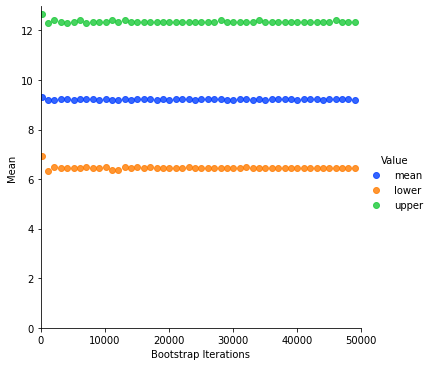

In [229]:
# Call your bootstrap function and plot the results

boots = []

means = []
lowers = []
uppers = []

for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    means.append(boot[0])
    lowers.append(boot[1])
    uppers.append(boot[2])


df_boot95 = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(palette="bright", x=df_boot95.columns[0], y=df_boot95.columns[1], data=df_boot95, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

print("mean, lower, upper")
print(f"{np.mean(means)}, {np.mean(lowers)}, {np.mean(uppers)}")

In [214]:
dft95 = df_boot95[-3:].T

print(dft95)



                           147       148        149
Bootstrap Iterations     49100     49100      49100
Mean                  9.209184  6.428571  12.357143
Value                     mean     lower      upper



Now, modify the bootstrap function you created above so that you can pass your
desired confidence interval as a parameter.



In [281]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
	# <---INSERT YOUR CODE HERE--->

    all_samples: np.ndarray = rng.choice(sample, (n_bootstraps, sample_size))
    data_mean = np.mean(all_samples)
    row_means: np.ndarray = np.mean(all_samples, axis=1)
    remainder = (100-ci)/2

    return data_mean, np.percentile(row_means, remainder), np.percentile(row_means, 100-remainder)


def bootstrap_std_ci(sample, sample_size, n_bootstraps, ci):
    all_samples: np.ndarray = rng.choice(sample, (n_bootstraps, sample_size))
    data_std = np.std(all_samples)
    row_std: np.ndarray = np.std(all_samples, axis=1)
    remainder = (100-ci)/2
    return data_std, np.percentile(row_std, remainder), np.percentile(row_std, 100-remainder)



mean, lower, upper
9.212069068336326, 7.566235714285713, 10.912857142857144


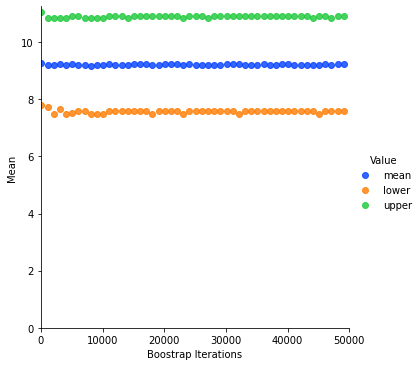

In [230]:
boots = []

means = []
lowers = []
uppers = []

for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 73)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])
    means.append(boot[0])
    lowers.append(boot[1])
    uppers.append(boot[2])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(palette="bright",x=df_boot.columns[0], y=df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

print("mean, lower, upper")
print(f"{np.mean(means)}, {np.mean(lowers)}, {np.mean(uppers)}")

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')

In [231]:
dft = df_boot[-3:].T

print(dft)



                        147       148        149
Boostrap Iterations   49100     49100      49100
Mean                 9.2177  7.571429  10.928571
Value                  mean     lower      upper


# Vehicles dataset

Now let's work on a different dataset, which is stored in the vehicles.csv file.


In [218]:
from typing import Tuple, Iterable

# Load and visualise the vehicles dataset
# To load the dataset: https://neptune.ai/blog/google-colab-dealing-with-files (check section "Load individual files directly from GitHub")

vdf = pd.read_csv('vehicles.csv')


vdf.head()

,Current fleet,New Fleet
0,18,24.0
1,15,27.0
2,18,27.0
3,16,25.0
4,17,31.0


In [219]:
old_v: np.ndarray = vdf.values.T[0]
_nv = vdf.values.T[1]
new_v: np.ndarray = _nv[~np.isnan(_nv)]


<AxesSubplot:>

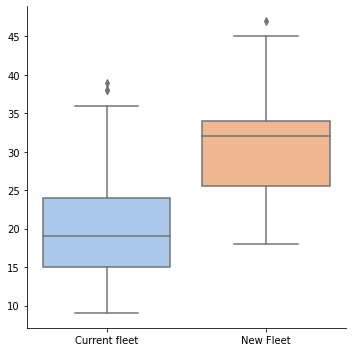

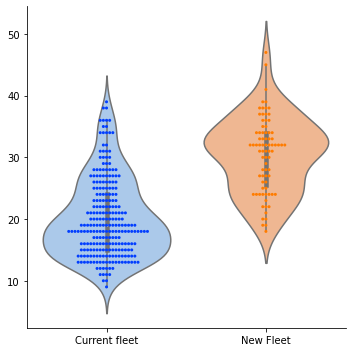

In [220]:
# Note that the current and new fleets are in different columns and have different lengths, so bear this in mind when you're plotting.
# You can create separate scatterplots for the two fleets, as you would with the histograms, 
# or plot them both in one plot (but not one against the other).
# <---INSERT YOUR CODE HERE--->

#f_axes: tuple[plt.Figure, np.ndarray] = plt.subplots(3,1,sharex=True, sharey=True, squeeze=True)

g = sns.catplot(data=vdf, kind="box",palette="pastel")
#sns.swarmplot(color="k", size=3, data=vdf, ax=g.ax)


g2 = sns.catplot(data=vdf, kind="violin",palette="pastel")
sns.swarmplot(palette="bright",size=3, data=vdf, ax=g2.ax)

#fig: plt.Figure = f_axes[0]

#ax1: plt.Axes = f_axes[1][0]
#ax2: plt.Axes = f_axes[1][1]
#ax3: plt.Axes = f_axes[1][2]

#ax1.scatter()

#sns.distplot(old_v, bins=20, kde=False, rug=True)


# Note: you can add more cells as needed to organise your code and your plots


## Compare the two fleets

The business analysts come up a comparison algorithm that requires the
upper and lower bounds for the mean in order to say which fleet is better.
1. Calculate the mean of both samples.
2. Using the bootstrap function that you created:
    - Construct the 95% CI of the mean of the current fleet.
    - Construct the 95% CI of the mean of the new fleet.
    - Are they comparable? (i.e., is one better than the other?) --
    - you can do this with a permutation test (check the lecture notes!)

(0.0, 50000.0)

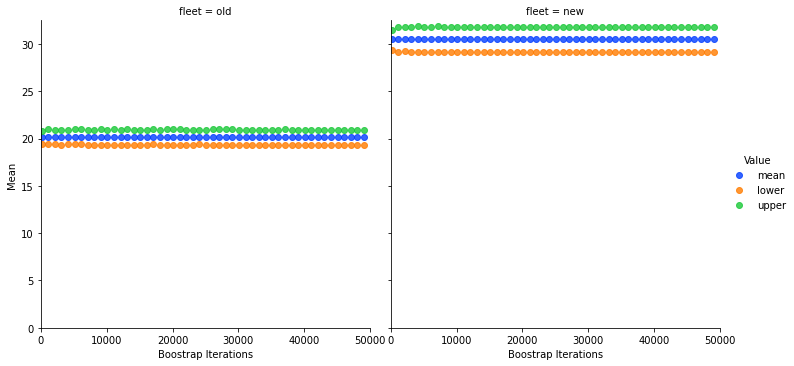

In [228]:
# <---INSERT YOUR CODE HERE--->
boots_old = []
boots_new = []
boots_both = []
for i in range(100, 50000, 1000):
    oboot= bootstrap_mean_ci(old_v, old_v.shape[0], i, 95)
    boots_both.append([i, oboot[0], "mean","old"])
    boots_both.append([i, oboot[1], "lower","old"])
    boots_both.append([i, oboot[2], "upper","old"])

    boots_old.append([i, oboot[0], "old mean"])
    boots_old.append([i, oboot[1], "old lower"])
    boots_old.append([i, oboot[2], "old upper"])

    nboot = bootstrap_mean_ci(new_v, new_v.shape[0], i, 95)
    boots_both.append([i, nboot[0], "mean","new"])
    boots_both.append([i, nboot[1], "lower","new"])
    boots_both.append([i, nboot[2], "upper","new"])
    boots_new.append([i, nboot[0], "new mean"])
    boots_new.append([i, nboot[1], "new lower"])
    boots_new.append([i, nboot[2], "new upper"])

b_boot = pd.DataFrame(boots_both,  columns=['Boostrap Iterations', 'Mean', "Value", "fleet"])
old_boot = pd.DataFrame(boots_old, columns=['Boostrap Iterations', 'Mean', "Value"])
new_boot = pd.DataFrame(boots_new, columns=['Boostrap Iterations', 'Mean', "Value"])


both_plot = sns.lmplot(palette="bright", x=b_boot.columns[0], y=b_boot.columns[1], col=b_boot.columns[3], data=b_boot, fit_reg=False, hue="Value")
both_plot.axes[0, 0].set_ylim(0,)
both_plot.axes[0, 0].set_xlim(0, 50000)

#old_plot = sns.lmplot(palette="bright",x=old_boot.columns[0], y=old_boot.columns[1], data=old_boot, fit_reg=False, hue="Value")
#old_plot.axes[0, 0].set_ylim(0,)
#old_plot.axes[0, 0].set_xlim(0, 50000)

#new_plot = sns.lmplot(palette="bright", x=new_boot.columns[0], y=new_boot.columns[1], data=new_boot, fit_reg=False, hue="Value")
#new_plot.axes[0, 0].set_ylim(0,)
#new_plot.axes[0, 0].set_xlim(0, 50000)


In [282]:
def format_conf_intervals(data, b_its, ci, mean=True) -> str:

    if mean:
        boots = bootstrap_mean_ci(data, data.shape[0], b_its, ci)
    else:
        boots = bootstrap_std_ci(data, data.shape[0], b_its, ci)
    return f"{boots[0]:.3f} | {boots[1]:.3f} | {boots[2]:.3f}"

In [286]:
print( "test  | Mean   | Lower  | Upper")
print(f"new60 | {format_conf_intervals(new_v, 10000, 60)}")
print(f"cus90 | {format_conf_intervals(data, 10000, 90)}")
print(f"cus95 | {format_conf_intervals(data, 10000, 95,False)}")
print(f"cus85 | {format_conf_intervals(data, 10000, 85,False)}")

test  | Mean   | Lower  | Upper
new60 | 30.482 | 29.899 | 31.063
cus90 | 9.199 | 6.857 | 11.786
cus95 | 5.683 | 2.711 | 7.382
cus85 | 5.688 | 3.295 | 6.946


In [232]:
old_dft = old_boot[-3:].T

print(old_dft)

                           147        148        149
Boostrap Iterations      49100      49100      49100
Mean                 20.142576  19.349398  20.951807
Value                 old mean  old lower  old upper


In [234]:
new_dft = new_boot[-3:].T

print(new_dft)

                           147        148        149
Boostrap Iterations      49100      49100      49100
Mean                 30.481731  29.139241  31.822785
Value                 new mean  new lower  new upper


In [246]:
np.array(np.meshgrid(old_v, new_v)).shape

(2, 79, 249)

In [262]:
# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """

    old = np.mean(sample1)
    olen = len(sample1)
    new = np.mean(sample2)
    obs = new - old

    concat: np.ndarray = np.concatenate((sample1, sample2))
    counter = 0
    for c in range(n_permutations):
        p = rng.permutation(concat)
        _omean = np.mean(p[:olen])
        _nmean = np.mean(p[olen:])
        if (_nmean - _omean) > obs:
            counter += 1
        #print(f"{_omean} {_nmean} {counter}")
    #print(counter)
    return counter/n_permutations


permut_test(old_v, new_v, 30000)

0.0

In [264]:
import voting_data

pa = voting_data.dem_share_PA.copy()
oh = voting_data.dem_share_OH.copy()
pa_l = len(pa)
oh_l = len(oh)

print(pa_l)
print(oh_l)


67
88


In [290]:
pa_bs = bootstrap_mean_ci(pa, pa_l, 100000, 98)
oh_bs = bootstrap_mean_ci(oh, oh_l, 100000, 98)

print( "State | Mean   | Lower  | Upper")
print(f"OH    | {oh_bs[0]:.3f} | {oh_bs[1]:.3f} | {oh_bs[2]:.3f}")
print(f"PA    | {pa_bs[0]:.3f} | {pa_bs[1]:.3f} | {pa_bs[2]:.3f}")

State | Mean   | Lower  | Upper
OH    | 44.320 | 41.871 | 46.764
PA    | 45.481 | 42.781 | 48.324


In [291]:
print(permut_test(oh, pa, 30000))



0.2328
